In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

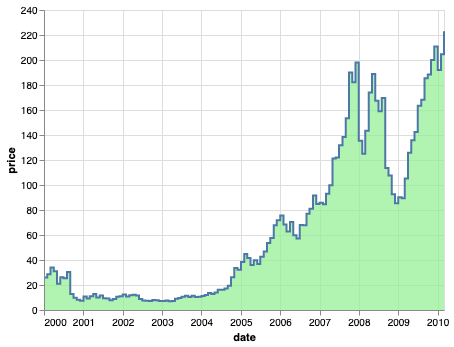

In [2]:
#Filled Step Chart
source = data.stocks()

alt.Chart(source).mark_area(
    color='LightGreen',
    interpolate='step-after',
    line=True
).encode(
    x='date',
    y='price'
).transform_filter(alt.datum.symbol == 'AAPL')

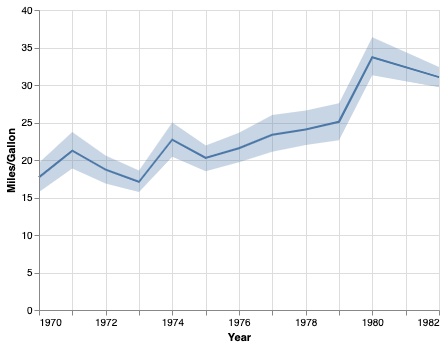

In [5]:
# Line Chart with Confidence Interval Band
source = data.cars()

# Configure the base chart
base = alt.Chart(source)

#Configure the line
line = base.mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)'
)

# Configure the confidence interval
confidence_interval = base.mark_area(opacity=0.3).encode(
    x='Year',
    y=alt.Y('ci0(Miles_per_Gallon)',
           axis=alt.Axis(title='Miles/Gallon')),
    y2='ci1(Miles_per_Gallon)'
)

# Draw the Chart
confidence_interval + line

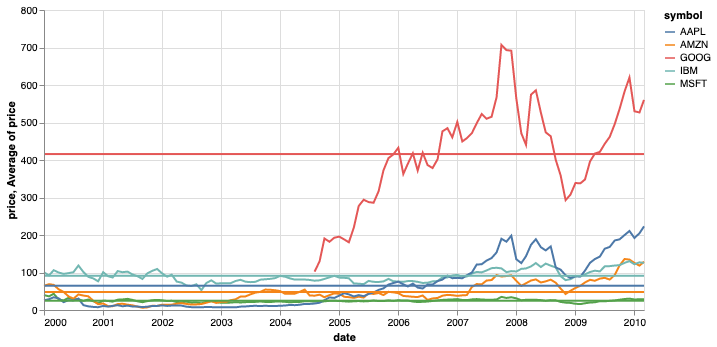

In [7]:
# Line Chart with Layered Aggregates
source = data.stocks()

base = alt.Chart(source).properties(width=600)

line = base.mark_line().encode(
    x='date',
    y='price',
    color='symbol'
)

rule = base.mark_rule().encode(
    y='average(price)',
    color='symbol',
    size=alt.value(2)
)

line + rule

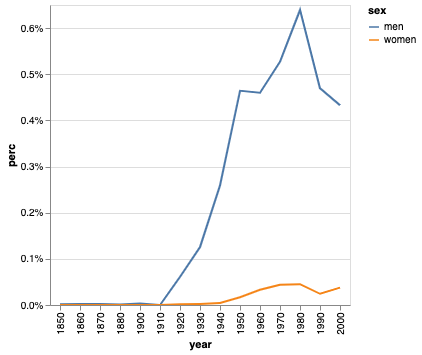

In [8]:
# Line Chart with Percent axis
source = pd.read_json(data.jobs.url)
welders = source[source.job == 'Welder']

alt.Chart(welders).mark_line().encode(
    alt.X('year:O'),
    alt.Y('perc:Q', axis=alt.Axis(format='%')),
    color='sex:N'
)

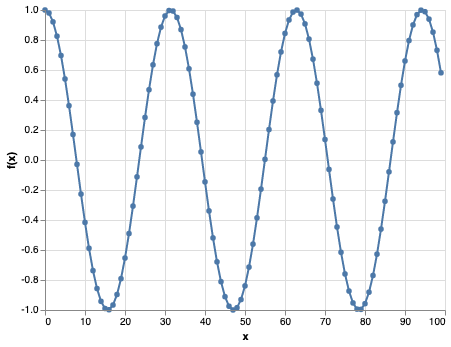

In [9]:
# Line Chart with Points
x = np.arange(100)
source = pd.DataFrame({
  'x': x,
  'f(x)': np.cos(x / 5)}
)

alt.Chart(source).mark_line(point=True).encode(
    x='x',
    y='f(x)'
)

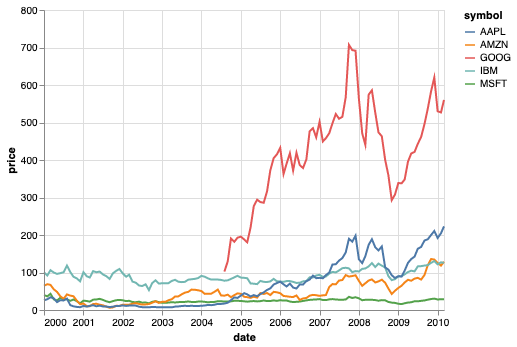

In [10]:
# Multi Series Line Chart
source = data.stocks()

alt.Chart(source).mark_line().encode(
    x='date',
    y='price',
    color='symbol'
)

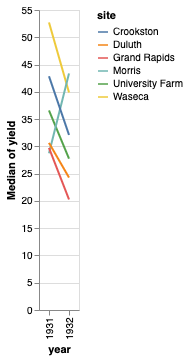

In [11]:
# Slope Graph
source = data.barley()

alt.Chart(source).mark_line().encode(
    x='year:O',  # When using datetime values, ordinal encoding is crucial to get the right look.
    y='median(yield)',
    color='site'
)

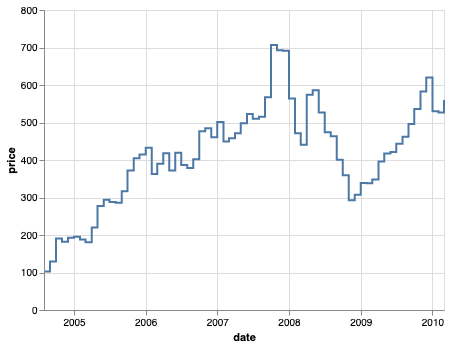

In [12]:
# Step Chart
source = data.stocks()

alt.Chart(source).mark_line(interpolate='step-after').encode(
    x='date',
    y='price'
).transform_filter(
    alt.datum.symbol == 'GOOG'
)